In [1]:
# Imports
# data analysis and wrangling
import pandas as pd
import numpy as np
import os
import random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")

import reuse_function as reuse
import importlib
importlib.reload(reuse)

#impute
from sklearn import impute
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.preprocessing import Imputer

In [2]:
# Read data
raw_df = pd.read_csv(r'C:\Users\agupt84\Desktop\ML\Mtech\Semester - I\DM - Data Mining\assignment\Assignment_DelhiBatch\coronary-heart-disease-prediction\data.csv')

In [3]:
raw_df.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,123,230,27,330,0,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,1,1,27,1,0,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,1,2,27,2,0,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,24,42,27,71,0,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,0,2,27,2,0,0,0.82,0.81,0,0,0,1,17.072697,0,0


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
ID        34281 non-null int64
IV        34281 non-null int64
A1        34281 non-null int64
A2        32538 non-null float64
A3        34281 non-null int64
A4        34281 non-null int64
A5        34281 non-null int64
A6        34281 non-null int64
A7        34281 non-null int64
A8        34281 non-null int64
A9        34281 non-null int64
A10       34281 non-null int64
A11       34281 non-null int64
A12       34281 non-null int64
A13       34281 non-null int64
A14       34281 non-null int64
A15       34281 non-null float64
A16       34281 non-null float64
A17       34281 non-null int64
A18       34281 non-null int64
A19       34281 non-null int64
A20       34281 non-null int64
A21       34281 non-null float64
A22       34281 non-null int64
Target    34281 non-null int64
dtypes: float64(4), int64(21)
memory usage: 6.5 MB


In [5]:
df_eda = raw_df.copy()

### EDA (Exploratory Data Analysis)

##### 1. Visualizing Distribution of Target Column

   Target  Counts    pct
0       0   22988  67.06
1       1   11293  32.94


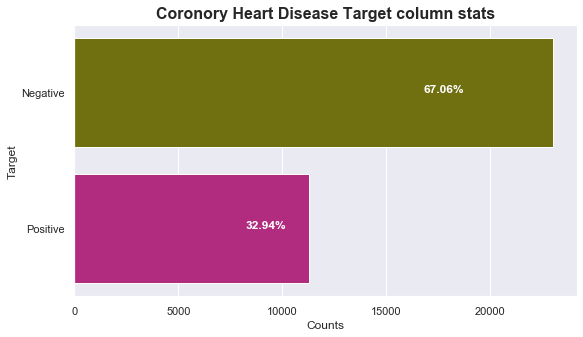

In [6]:
# Target column analysis
sns.set(style="darkgrid")
targetcoldf = raw_df.groupby('Target').agg({'Target':['count']}).reset_index()
targetcoldf.columns = ['Target','Counts']
targetcoldf['pct'] = round(targetcoldf['Counts']/(len(raw_df))*100,2)
palette = ['olive','mediumvioletred']
print (targetcoldf.head())
fig, ax = plt.subplots(figsize=(9,5))
fig = sns.barplot(x='Counts', y='Target',data=targetcoldf, ci = None, orient='h', palette=palette)

y_lab = ['Negative', 'Positive']
ax.set_yticklabels(labels=y_lab, ha='right')

for i, v in enumerate(targetcoldf['pct']):
    ax.text(v*250, i, str(v)+'%', color='white', fontweight='bold')

plt.title('Coronory Heart Disease Target column stats',size = 16, weight = 'bold')
plt.ylabel('Target')
plt.xlabel('Counts');


##### The Target class looks fine.

##### 2. Check Columns with Missing Data 

In [7]:
def get_missing_data_stats(df):
    missing_data = df.isin([-99, -999, np.nan]).sum()
    per_missing_data = round(missing_data/len(df)*100,2).sort_values(ascending=False)
    if (len(per_missing_data[per_missing_data > 0]) > 0):
        print ('Below are columns with correspondind missing data %s:')
        print ('-----------------------------------------------------')
        print ('Column ~ Missing %')
        print ('-------------------')
        print (per_missing_data[per_missing_data > 0])
        print ('-------------------')

        plt.subplots(figsize=(9,9))
        sns.heatmap(df.isin([-99, -999, np.nan]))
        plt.show()
    else:
        print ('------------------------------')
        print ('No column has missing data :-)')
        print ('------------------------------')

Below are columns with correspondind missing data %s:
-----------------------------------------------------
Column ~ Missing %
-------------------
A15    6.51
A16    6.13
A2     5.08
dtype: float64
-------------------


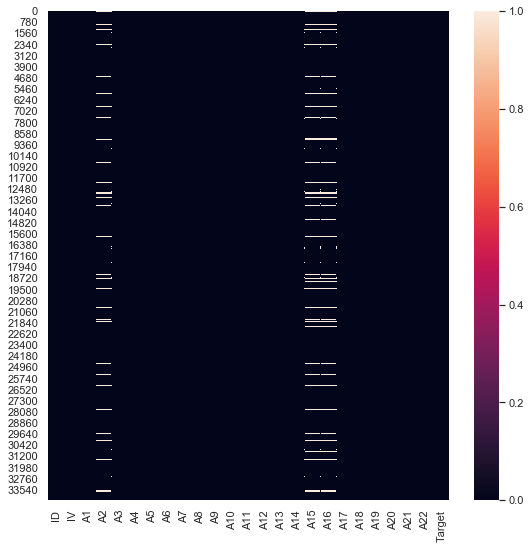

In [8]:
get_missing_data_stats(raw_df)

##### A2, A15 & A16 columns have missing data of ~5%. It needs to be imputed.

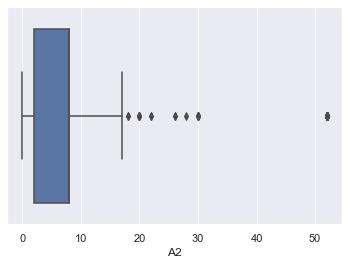

In [9]:
sns.boxplot(x=raw_df['A2'])

In [10]:
# Impute library to imput missing data based on median

imputer = impute.SimpleImputer(missing_values=np.nan, strategy='median')
imputer1 = impute.SimpleImputer(missing_values=-99, strategy='median')
# knnimputer = impute.KNNImputer(missing_values=-99)

In [11]:
df_eda['A2'] = imputer.fit_transform(np.array(df_eda['A2']).reshape(-1,1))
df_eda['A15'] = imputer1.fit_transform(np.array(df_eda['A15']).reshape(-1,1))
df_eda['A16'] = imputer1.fit_transform(np.array(df_eda['A16']).reshape(-1,1))

In [12]:
get_missing_data_stats(df_eda)

------------------------------
No column has missing data :-)
------------------------------


In [13]:
df_eda.describe()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.428100e+04,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.0,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,1.979838e+06,236.252005,36.126367,7.387970,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,132.947551,236.647122,27.0,341.151863,0.001838,1.744757,0.759845,0.754729,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,6.384855e+05,3326.574620,427.707021,6.008192,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,4151.795360,4528.960060,0.0,5005.764257,0.042830,26.077507,0.253245,0.245080,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,1.058628e+06,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.464342e+06,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.0,0.000000,0.000000,0.000000,0.680000,0.680000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,1.841719e+06,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.000000,6.000000,27.0,8.000000,0.000000,0.000000,0.830000,0.820000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,2.254242e+06,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,19.000000,37.000000,27.0,54.000000,0.000000,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,3.274754e+06,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,742110.000000,742750.000000,27.0,743215.000000,1.000000,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


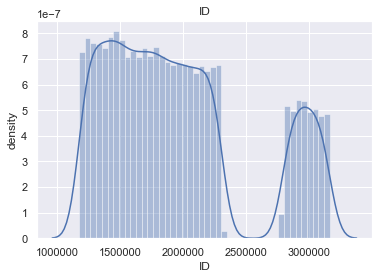

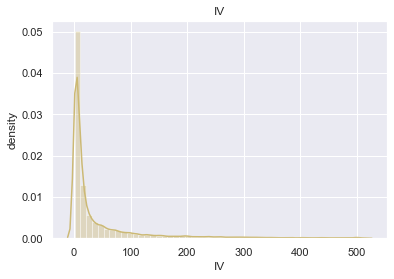

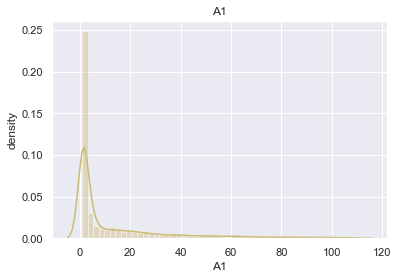

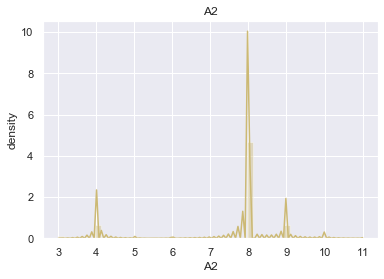

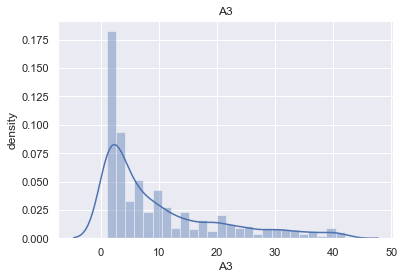

C:\Users\agupt84\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


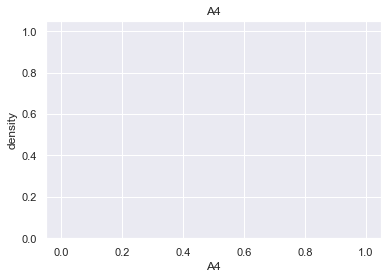

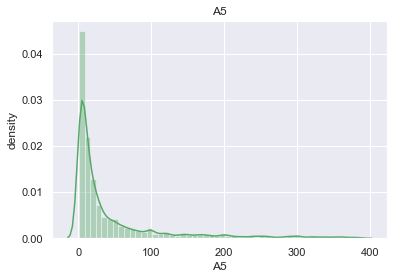

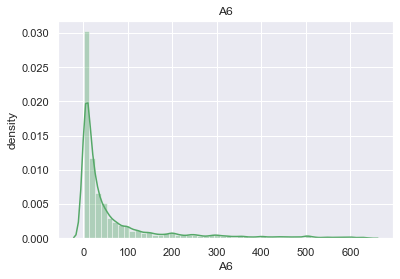

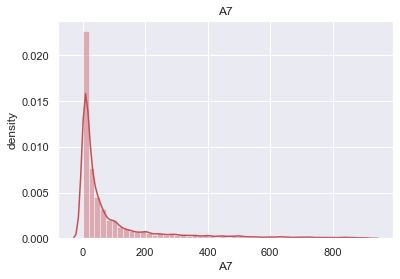

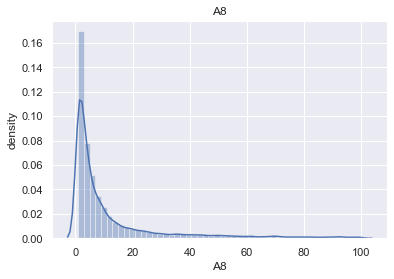

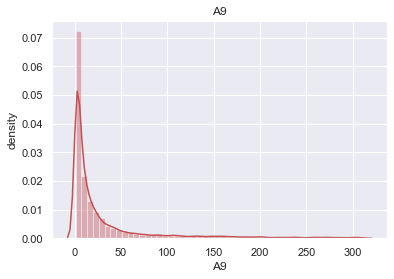

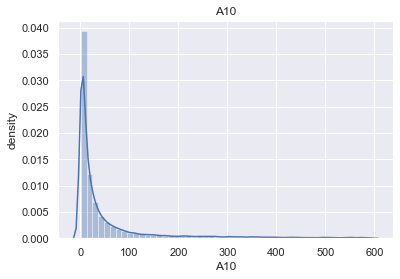

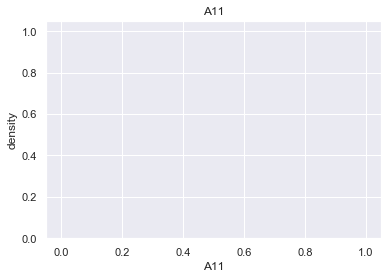

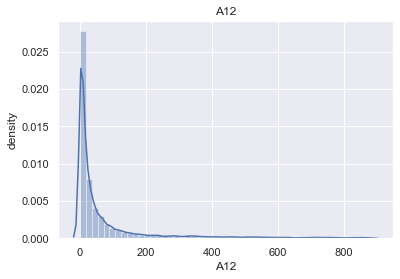

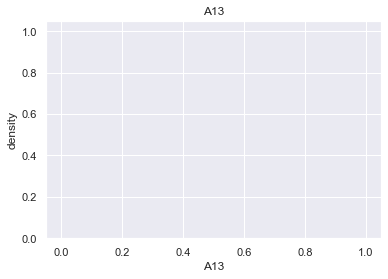

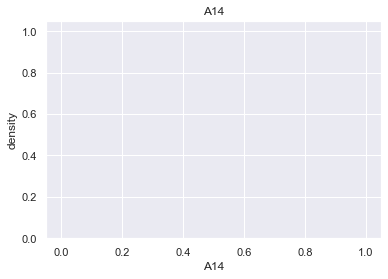

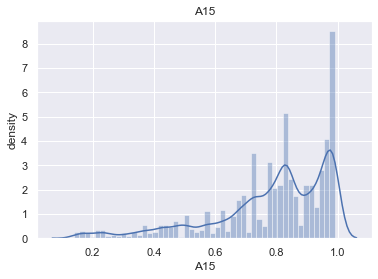

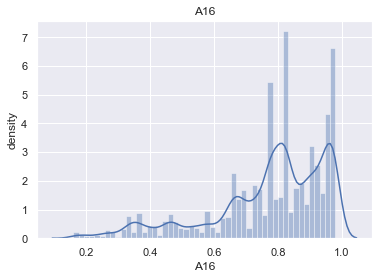

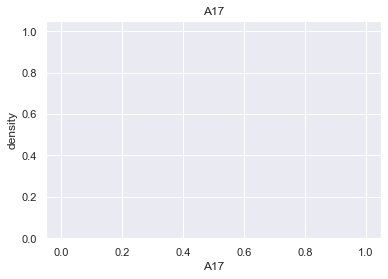

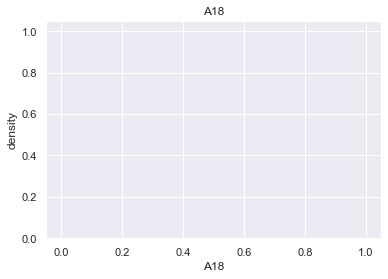

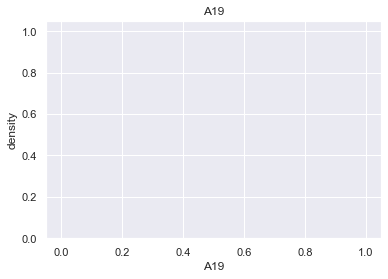

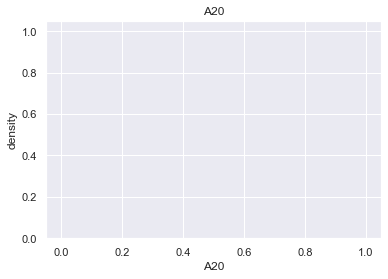

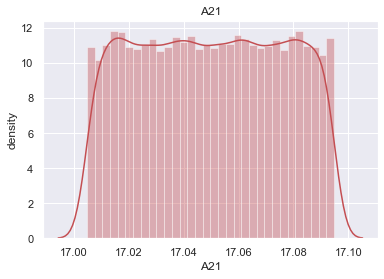

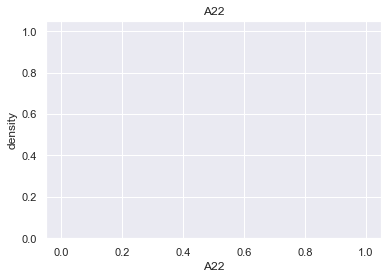

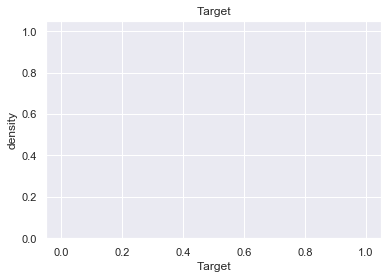

In [14]:
##### 3. Generating Univariate plots
reuse.distplot_numericdata(df_eda)

##### Bivariate plot

In [15]:
df_eda.columns

Index(['ID', 'IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'Target'],
      dtype='object')

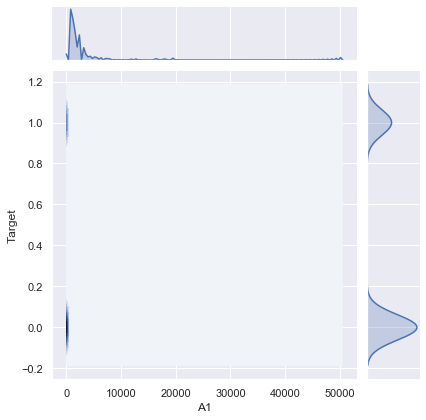

In [16]:
# Joint plots
reuse.bivariate_analysis(df_eda, 'A1','kde')


##### 3. Check Correlation between columns using Heatmap

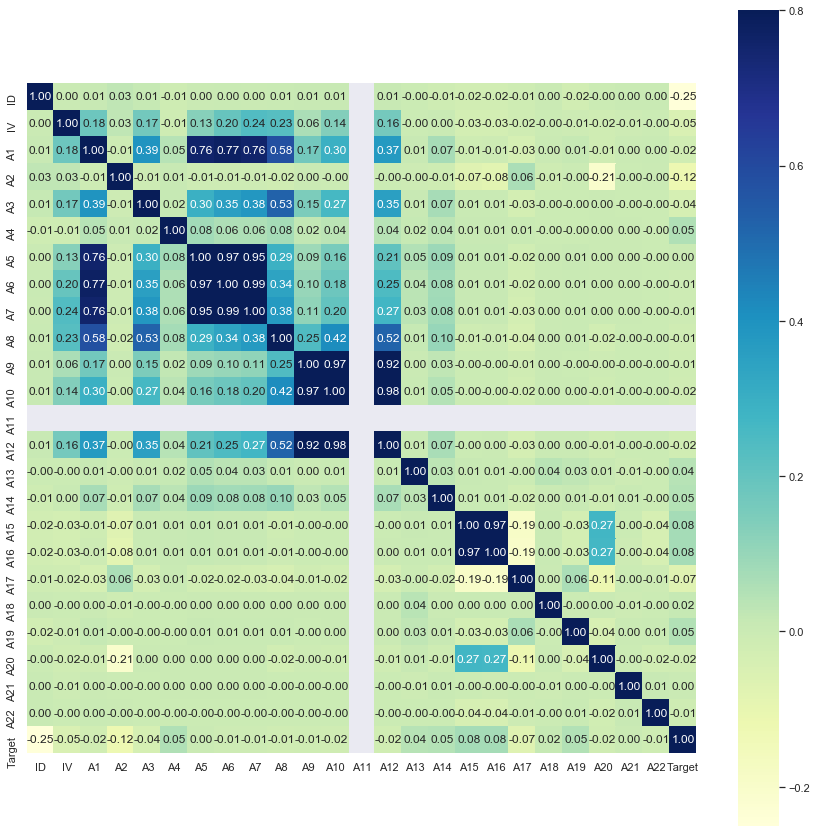

In [17]:
corr_matrix = raw_df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,
           vmax=.8,
           square=True,
           annot=True,
           fmt='.2f',
           cmap='YlGnBu')

#### EDA Observations:
> Correlation Observations:
 - Column **A5,A6,A7** are correlated with each other. Thus, **A5,A6 can be dropped.**  
 - Column **A15, A16** are also correlated with each other. Thus, **A15 can be dropped.**  
 - Columns **A9, A10, A12** are also strongly correlated with each other. Thus, **A9, A10 can be dropped.**  
 - Columns **A5, A21** shows **NO corelation** with '**Target**' column. These can be dropped as well.  

> Other observations:
 - Column A11 can be dropped as all rows carries same value. Thus, no information can be gained from this.
 - Column ID can be dropped as all values are unique. Thus, no information can be gained from this.

In [18]:
# Drop columns based on Correlation analysis
cols_to_drop = ['ID','A5','A6','A9','A10','A11','A16','A21']
df_post_eda = df_eda.drop(columns=cols_to_drop, axis=1)

In [19]:
df_post_eda.head()

,IV,A1,A2,A3,A4,A7,A8,A12,A13,A14,A15,A17,A18,A19,A20,A22,Target
0,2049,44,8.0,11,0,0,38,330,0,0,0.52,0,0,0,1,0,0
1,48,0,8.0,0,0,0,1,1,0,0,0.59,1,0,0,1,0,0
2,318,2,9.0,0,0,0,0,2,0,0,0.94,1,0,0,0,0,0
3,62,4,2.0,0,0,30,7,71,0,0,0.51,0,0,0,1,0,0
4,2,0,8.0,0,0,1,0,2,0,0,0.82,0,0,0,1,0,0


In [20]:
pd.crosstab(index=raw_df['A22'], columns=df_eda['Target'])

Target,0,1
A22,,
0,22981,11293
1,7,0


### Pre-processing

In [21]:
# Apply logarithmic transformation
for col in df_eda.columns:
    print ('Range for col :', col)
    print (min(df_eda[col]), '~', max(df_eda[col]))

Range for col : ID
1058628 ~ 3274754
Range for col : IV
-2999 ~ 366924
Range for col : A1
0 ~ 50547
Range for col : A2
0.0 ~ 52.0
Range for col : A3
0 ~ 31750
Range for col : A4
0 ~ 2999
Range for col : A5
0 ~ 260660
Range for col : A6
0 ~ 438020
Range for col : A7
0 ~ 533540
Range for col : A8
0 ~ 21071
Range for col : A9
0 ~ 742110
Range for col : A10
0 ~ 742750
Range for col : A11
27 ~ 27
Range for col : A12
0 ~ 743215
Range for col : A13
0 ~ 1
Range for col : A14
0 ~ 1488
Range for col : A15
0.0 ~ 1.0
Range for col : A16
0.0 ~ 1.0
Range for col : A17
0 ~ 1
Range for col : A18
0 ~ 1
Range for col : A19
0 ~ 1
Range for col : A20
0 ~ 1
Range for col : A21
17.00000463 ~ 17.09999495
Range for col : A22
0 ~ 1
Range for col : Target
0 ~ 1


In [22]:
# Z score 

### Modelling

> - Split data in train and test set
> - Fit the model
> - Check Accuarcy/Precision/Recall
> - Predict on test set and match with result 

In [23]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, auc, classification, classification_report, confusion_matrix, plot_roc_curve, plot_confusion_matrix

C:\Users\agupt84\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
# Seperate Target column from X and create y for Target variable
X = df_post_eda.drop(axis=1, columns=['Target'])
y = df_post_eda['Target']

In [25]:
# Impute Train data
X['A2'] = imputer.fit_transform(np.array(X['A2']).reshape(-1,1))
X['A15'] = imputer1.fit_transform(np.array(X['A15']).reshape(-1,1))
# X['A16'] = imputer1.fit_transform(np.array(X['A16']).reshape(-1,1))

In [26]:
X.columns

Index(['IV', 'A1', 'A2', 'A3', 'A4', 'A7', 'A8', 'A12', 'A13', 'A14', 'A15',
       'A17', 'A18', 'A19', 'A20', 'A22'],
      dtype='object')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [28]:
print ('Train Data Shape :', X_train.shape)
print ('Test Data shape :', X_test.shape)

Train Data Shape : (23996, 16)
Test Data shape : (10285, 16)


In [36]:
model = DecisionTreeClassifier(criterion='entropy',random_state=45, max_depth=4)
model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=45, splitter='best')

In [37]:
# Predict on test data
y_predict = model.predict(X=X_test)

Accuracy of classifier is : 0.8497812348079727
              precision    recall  f1-score   support

     class_0       0.89      0.88      0.89      6908
     class_1       0.77      0.78      0.77      3377

    accuracy                           0.85     10285
   macro avg       0.83      0.83      0.83     10285
weighted avg       0.85      0.85      0.85     10285



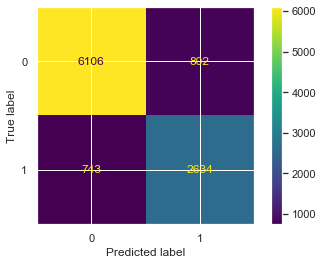

In [38]:
# validate accuracy
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=y_predict))
print (classification_report(y_true=y_test, y_pred=y_predict, target_names=['class_0','class_1']))
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, values_format='.0f')

In [39]:
key = X_train.columns
val = model.feature_importances_
dict1 = {key[i]: val[i] for i in range(0,len(key))}

In [40]:
dict1

{'IV': 0.39997277776745305,
 'A1': 0.0,
 'A2': 0.011381786117420335,
 'A3': 0.0,
 'A4': 0.0,
 'A7': 0.4693676729027423,
 'A8': 0.09535888732198312,
 'A12': 0.008977736282349588,
 'A13': 0.0,
 'A14': 0.0,
 'A15': 0.01242032193276748,
 'A17': 0.0,
 'A18': 0.0,
 'A19': 0.0,
 'A20': 0.0025208176752841024,
 'A22': 0.0}

In [41]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

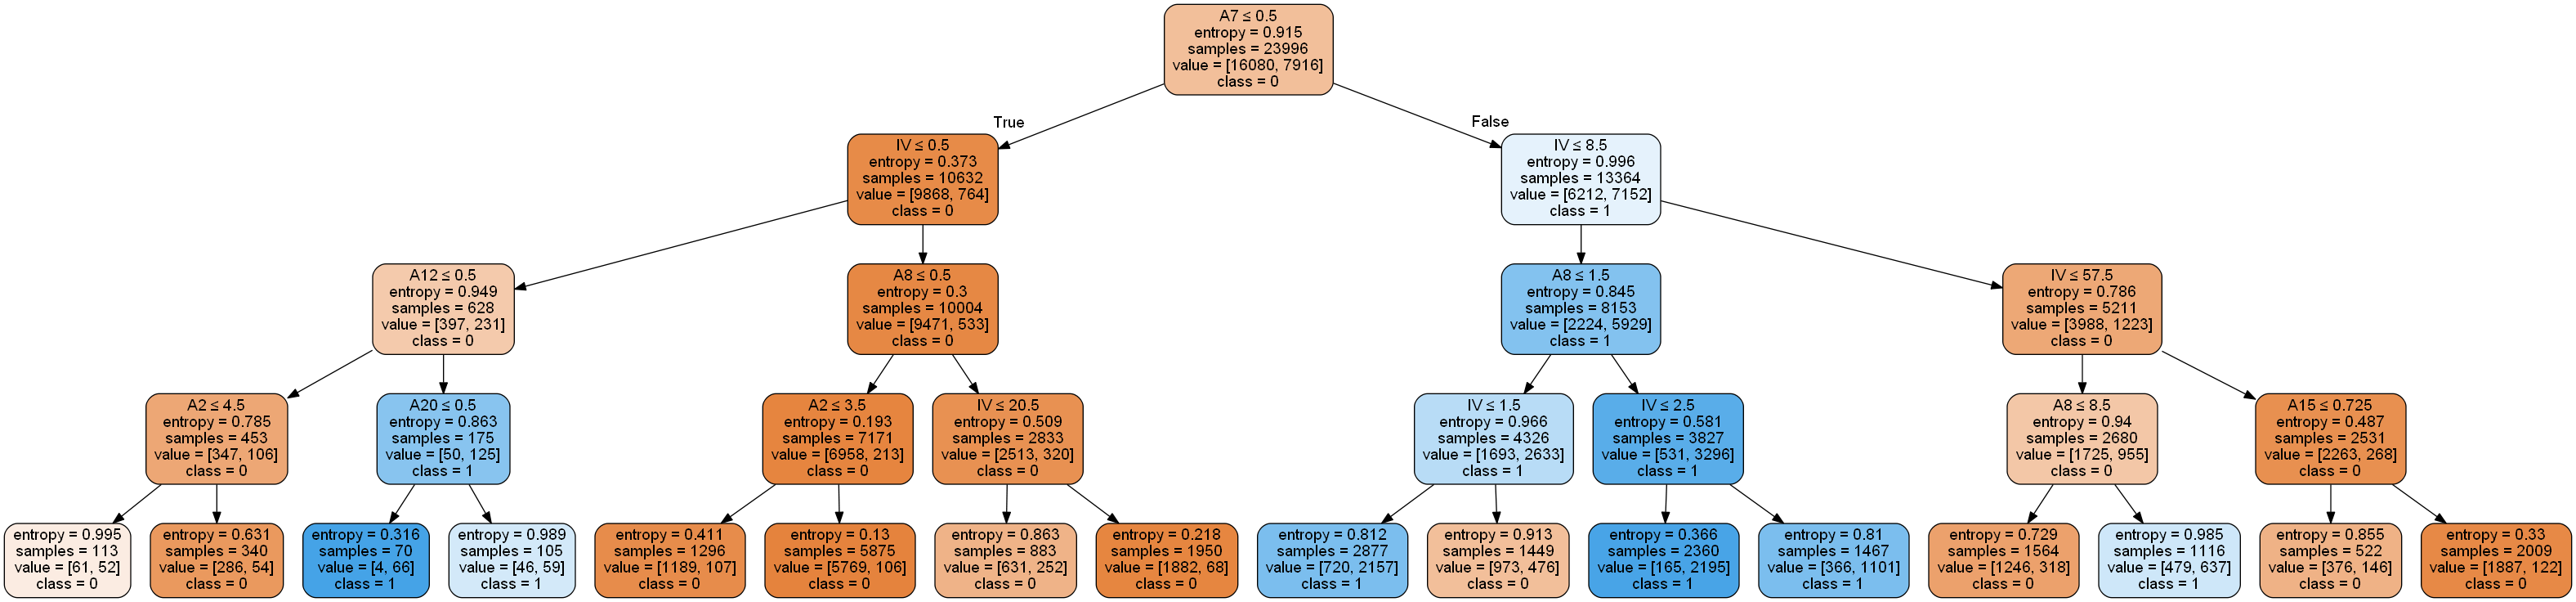

In [42]:
# Visualizing Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree=model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('coronary-heart-disease.png')
Image(graph.create_png())